In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Datasets/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

/home/andrea/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Now we look at the distribution of the attacks every year, focusing on different countries.

Text(0, 0.5, 'Count')

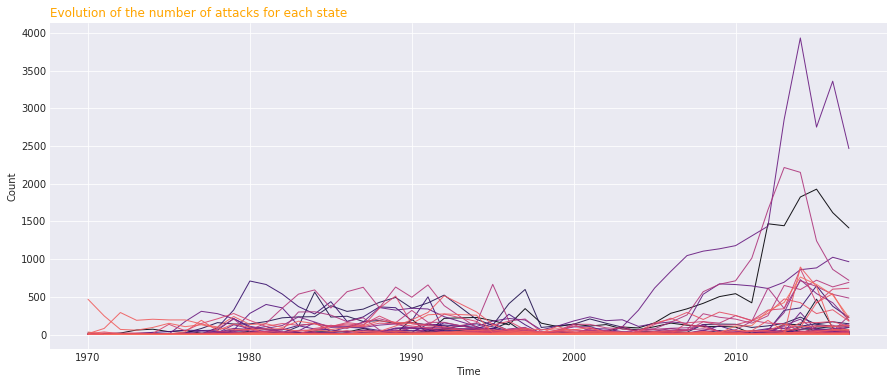

In [3]:
dscnt = pd.read_csv('./dataset/tot_year+country')

codes = dscnt.CountryCode.unique()
# codes = codes[60:70]

# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('magma')

plt.subplots(figsize=(15,6))
num=0
for code in codes:
    num+=1
    plt.plot(dscnt[dscnt.CountryCode == code].iyear, dscnt[dscnt.CountryCode == code].cnt, marker='', color=palette(num), linewidth=1, alpha=0.9, label=code)

# Add legend
# plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Evolution of the number of attacks for each state", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Count")



#### The first plot is a bit confusing, so we just plot the first 10 countries.

Text(0, 0.5, 'Count')

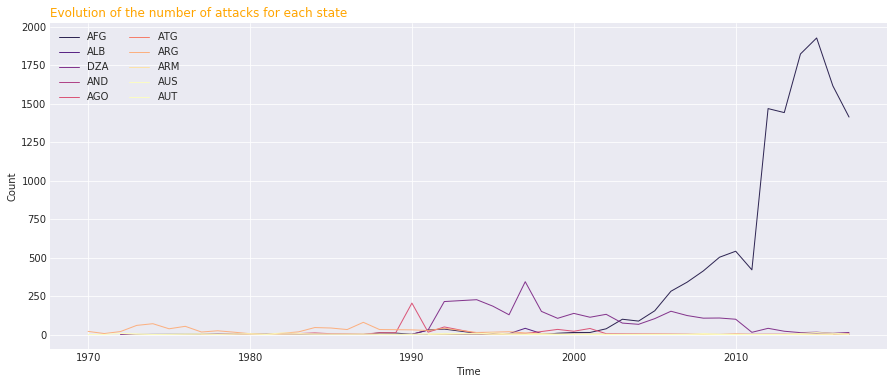

In [4]:
codes = dscnt.CountryCode.unique()
codes = codes[0:10]

# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('magma')

plt.subplots(figsize=(15,6))
num=0
for code in codes:
    num+=30
    plt.plot(dscnt[dscnt.CountryCode == code].iyear, dscnt[dscnt.CountryCode == code].cnt, marker='', color=palette(num), linewidth=1, alpha=0.9, label=code)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Evolution of the number of attacks for each state", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Count")



#### As we can see form the plot, each country has different behaviors concerning the number of attacks, over the years. It could be interesting to know which attributes increase the risk of having an higher number of attacks.

By the way, looking at the data with a Geospatial representation, we have a better look at them.

As an example we will plot only the attacks in the year 2010. 

In [5]:
dscnt.head()
to_plot = dscnt[dscnt['iyear'] == 2010]
to_plot.sort_values(by='cnt',inplace=True)
to_plot

/home/andrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CountryCode,iyear,cnt
3504,ZWE,2010.0,1.0
2258,NLD,2010.0,1.0
2565,POL,2010.0,1.0
2041,MRT,2010.0,1.0
2009,MLI,2010.0,1.0
...,...,...,...
3102,THA,2010.0,253.0
24,AFG,2010.0,542.0
1418,IND,2010.0,663.0
2406,PAK,2010.0,713.0


In [6]:
import folium

country_geo = './dataset/world-countries.json'

# Setup a folium map at a high-level zoom

map = folium.Map(location=[53, 9], zoom_start=1.8)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations

folium.Choropleth(geo_data=country_geo, data=to_plot,
columns=['CountryCode','cnt'],
key_on='feature.id',
fill_opacity=0.7, line_opacity=0.5,
fill_color='YlOrRd',
legend_name='Events',
bins = 9).add_to(map)
map.save('plot_data3.html')
# Import the Folium interactive html file
from IPython.display import IFrame
IFrame('plot_data3.html', width=800, height=650)

In 2010 the majority of attacks was done in Iraq, Pakistan, India and Afghanistan. (the Dark grey color means 0 attacks in that country).

Now we want to look at some attributes, starting from the Urban Population.

In [7]:
indicators = pd.read_csv("Datasets/Indicators.csv")

In [8]:
urb_pop = pd.DataFrame(indicators[indicators.IndicatorCode == 'SP.URB.TOTL'][['CountryCode','Year','Value']])
urb_pop2000 = pd.DataFrame(urb_pop[urb_pop.Year == 2000])
urb_pop2000.sort_values(by='Value', ascending=False).head()

,CountryCode,Year,Value
3190414,WLD,2000,2.834926e+09
3181301,LMY,2000,1.864590e+09
3184703,MIC,2000,1.758650e+09
3189874,UMC,2000,1.002089e+09
3177661,HIC,2000,9.703362e+08


I capped the UrbanPopulation value to have a better visualization on the map.

In [9]:
urb_pop2000.loc[urb_pop2000.Value > 1e8, 'Value'] = 1e8

urb_pop2000.sort_values(by='Value', ascending=False).head()

,CountryCode,Year,Value
3171446,ARB,2000,100000000.0
3319457,USA,2000,100000000.0
3182781,LMC,2000,100000000.0
3183233,MEA,2000,100000000.0
3183960,MNA,2000,100000000.0


In [10]:
import folium

country_geo = './dataset/world-countries.json'

# Setup a folium map at a high-level zoom

map = folium.Map(location=[53, 9], zoom_start=1.8)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations

folium.Choropleth(geo_data=country_geo, data=urb_pop2000,
columns=['CountryCode','Value'],
key_on='feature.id',
fill_opacity=0.7, line_opacity=0.5,
fill_color='YlOrRd',
legend_name='Urban population',
bins = 6).add_to(map)
map.save('plot_data3.html')
# Import the Folium interactive html file
from IPython.display import IFrame
IFrame('plot_data3.html', width=800, height=650)

In India and Pakistan we have an high value of Urban Population. It could be an important information? We will see in the analysis.

After we take a look at the arms import.

In [11]:
arms_import = pd.DataFrame(indicators[indicators.IndicatorCode == 'MS.MIL.MPRT.KD'][['CountryCode','Year','Value']])
arms_import2000 = pd.DataFrame(arms_import[arms_import.Year == 2000])
arms_import2000.sort_values(by='Value', ascending=False).head()
arms_import2000.head()

,CountryCode,Year,Value
3171061,ARB,2000,2.773000e+09
3171500,CSS,2000,4.600000e+07
3171928,CEB,2000,2.350000e+08
3172492,EAS,2000,6.472000e+09
3172998,EAP,2000,2.870000e+09


Even here we capped the values, in order to have a better visualization.

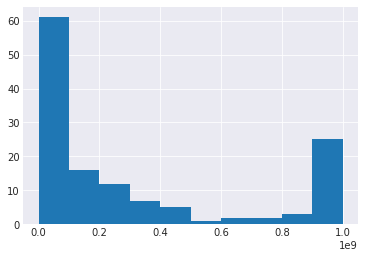

In [12]:
arms_import2000.loc[arms_import2000.Value > 1e9, 'Value'] = 1e9
arms_import2000.Value.hist()

In [13]:
import folium

country_geo = './dataset/world-countries.json'

# Setup a folium map at a high-level zoom

map = folium.Map(location=[53, 9], zoom_start=1.8)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations

folium.Choropleth(geo_data=country_geo, data=arms_import2000,
columns=['CountryCode','Value'],
key_on='feature.id',
fill_opacity=0.7, line_opacity=0.5,
fill_color='YlOrRd',
legend_name='Arms import',
bins = 3).add_to(map)
map.save('plot_data3.html')
# Import the Folium interactive html file
from IPython.display import IFrame
IFrame('plot_data3.html', width=800, height=650)

In India we have an high import of arms, but we don't have this information for the Afghanistan and Iraq (probably they want to keep this data protected?). Instead, Pakistan has a low value in Arms Import.

By the way, we don't know if this information, taken in absolute value, is important, maybe we can re-arrange this info in a more specific metric. 